# Creating A Synthetic Dataset for Association Rule Learning with the Apriori Algorithm

* Apriori[1] is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis [2].

* The Apriori algorithm is generally applied for finding "item combinations are frequently seem together?".

* In this study, I want to show you how to apply association rule learning on a different topic than market shopping.

##  Marine Seismic Interpretation Example

**Story**: I am a marine geoscientist who interprets marine structures and related anomalies on seismic data in the Sea of Marmara. A lot of data came in and I interpreted them and created a database. What I'm wondering is to predict which anomalies might appear together in the next data. (I assume that the area is homogeny)

**Aim**: Generating a dataset of random seismic anomalies

**the idea**: Generating all kind of combination with the items in the list, and choosing randomly samples in it. Each of elements represents one interpretation information in new created list

In [1]:
# function for show the image 

def add_pic(image_list, x = 20, y = 15, rows = 1, path=""):

    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(x, y))

    rows = rows
    columns = len(image_list)
    path = path

    for num, name in enumerate(image_list):
    
        fig.add_subplot(rows, columns, num+1)
    
        plt.imshow(mpimg.imread(path+name))
    
        plt.axis('off')
    
        plt.title(name)

-----------

### one of the Interpreted marine seismic views acquired the from Sea of Marmara, Western High [3]

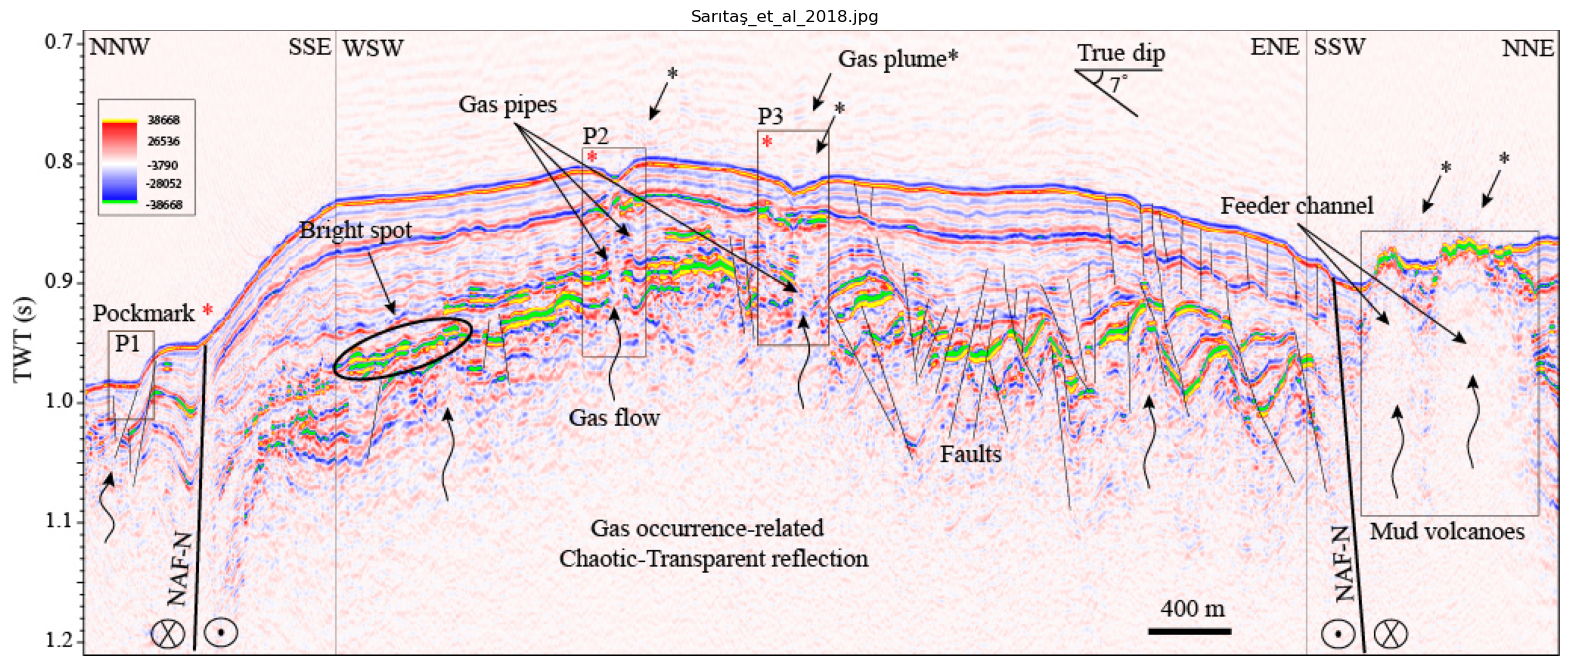

In [2]:
img_list = ["Sarıtaş_et_al_2018.jpg"]

add_pic(image_list = img_list, x = 20, y = 15, rows = 1, path="pic/")

**definitions**
* gas pipe = seismic anomaly indicating the presence of upward gas movement through sediments
* gas flow = gas migration 
* gas plue = seismic anomaly indicating presence of gas movement to sea column from sea surface
* pockmark = pit seen on the seafloor due to the presence of gas
* mud volcano = structures that throw out mud breccia in a sudden explosion to surface due to high pressure and comminution 
* mud diapir = concave Structures that form mid breccia under surface due to high pressure and comminution
* feeder channel = mud volcano breccia is extruded from one major funnel called feeder channel
* falut = a crack in the earth's surface where the rock has divided into two parts that move against each other
* anticline = an anticline is a type of fold that is an arch-like shape and has its oldest beds at its core
* gassy sedimet = sediment with gas bubbles

---------

## Example for Marine Science

In [3]:
import numpy as np
import pandas as pd
from itertools import combinations, chain
import matplotlib.pyplot as plt
import random

#### list of Seismic Interpretation 

In [4]:
# write your items as a list

list_of_seismic = ["gassy sediment","mud volcano","mud diapir","feeder channel", "fault","gas flow", "gas plume", 
                 "pockmark", "carbonate structure", "gas acummulation","anticline","monocline","channel","erosional surface"]

In [5]:
len(list_of_seismic)

14

----------

#### Combination of items in the list 

* "combination" method :  itertools.combinations() provides us with all the possible tuples a sequence or set of numbers or letters used in the iterator and the elements are assumed to be unique on the basis of their positions which are distinct for all elements. All these combinations are emitted in lexicographical order. This function takes ‘r’ as input here ‘r’ represents the size of different combinations that are possible. All the combinations emitted are of length ‘r’ and ‘r’ is a necessary argument here. combinations(iterator, r) [4]

In [6]:
# 1 to 4 combinations of items list. 
# 4: max number of association up to your scenario
# output is nested list with set type items

comb_list = [[b  for b in combinations(list_of_seismic , r)] for r in range(1,4)]

# examples
for i in range(len(comb_list)):
    
    print(comb_list[i][0:5])

[('gassy sediment',), ('mud volcano',), ('mud diapir',), ('feeder channel',), ('fault',)]
[('gassy sediment', 'mud volcano'), ('gassy sediment', 'mud diapir'), ('gassy sediment', 'feeder channel'), ('gassy sediment', 'fault'), ('gassy sediment', 'gas flow')]
[('gassy sediment', 'mud volcano', 'mud diapir'), ('gassy sediment', 'mud volcano', 'feeder channel'), ('gassy sediment', 'mud volcano', 'fault'), ('gassy sediment', 'mud volcano', 'gas flow'), ('gassy sediment', 'mud volcano', 'gas plume')]


------------

#### Combining lists in a list

* chain.from_iterable: This function takes a single iterable as an argument and all the elements of the input iterable should also be iterable and it returns a flattened iterable containing all the elements of the input iterable[5]

In [7]:
comb_list_sum = list(chain.from_iterable(comb_list))

# lenght of the list

print("lentg of the list: ",len(comb_list_sum))
print("samples from the list: ",comb_list_sum[:20])

lentg of the list:  469
samples from the list:  [('gassy sediment',), ('mud volcano',), ('mud diapir',), ('feeder channel',), ('fault',), ('gas flow',), ('gas plume',), ('pockmark',), ('carbonate structure',), ('gas acummulation',), ('anticline',), ('monocline',), ('channel',), ('erosional surface',), ('gassy sediment', 'mud volcano'), ('gassy sediment', 'mud diapir'), ('gassy sediment', 'feeder channel'), ('gassy sediment', 'fault'), ('gassy sediment', 'gas flow'), ('gassy sediment', 'gas plume')]


------------

#### Random Samples

In [8]:
# getting random samples from the combined list to make more realistic dataset.
# in this example 100 samples used, you can change this number
# if you want to get always the same output in each time, use random.seed(put any number)

random.seed(35) 
comb_random = random.sample(comb_list_sum, 100)

In [9]:
comb_random
print("lentg of the list: ",len(comb_random))
print("samples from the list: ",comb_random[::10])

lentg of the list:  100
samples from the list:  [('mud diapir', 'gas plume', 'monocline'), ('gassy sediment', 'feeder channel', 'gas flow'), ('mud volcano', 'mud diapir', 'pockmark'), ('pockmark', 'anticline', 'monocline'), ('monocline',), ('mud volcano', 'mud diapir', 'fault'), ('mud volcano', 'gas plume', 'monocline'), ('gas flow', 'pockmark', 'anticline'), ('mud volcano', 'gas acummulation', 'erosional surface'), ('gassy sediment', 'feeder channel', 'carbonate structure')]


-------------

## List to Tidy Dataframe for Apriori

* to apply Apriori the dataset should be created with special format including (0 and 1) or (True and False)
* The dataset variables will be the "list_of_seismic" we created at the beginning
* the index will be "comb_random" list including random combination samples
* value of the varibales in the dataset will be 1 or 0 according to if the variable is in index or not
* we want the dataset to be as below

In [10]:
# Description                      fault   pockmark   gas flow ............
# products
# ('mud volcano', 'fault')           1         0        1
# ('pockmark', 'fault')              1         1        0
# ('gas flow', 'pockmark')           0         1        1
# .......

#### Create Dataframe

In [11]:
# create empty dataframe, add products variable, set this variable as index

df = pd.DataFrame()

df["products"] = comb_random

df = df.set_index("products")

In [12]:
df.head()

""
products
"(mud diapir, gas plume, monocline)"
"(gassy sediment, carbonate structure, channel)"
"(fault, channel, erosional surface)"
"(fault, channel)"
"(fault, monocline, channel)"


-----------------

#### Add New Variables with 0 

In [13]:
# Adding as many empty variables as the number of items

for i in range(len(list_of_seismic)):
    
    df[i] = 0

In [14]:
# change the colums name

df.columns = list_of_seismic

In [15]:
df.head()

,gassy sediment,mud volcano,mud diapir,feeder channel,fault,gas flow,gas plume,pockmark,carbonate structure,gas acummulation,anticline,monocline,channel,erosional surface
products,,,,,,,,,,,,,,
"(mud diapir, gas plume, monocline)",0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(gassy sediment, carbonate structure, channel)",0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(fault, channel, erosional surface)",0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(fault, channel)",0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(fault, monocline, channel)",0,0,0,0,0,0,0,0,0,0,0,0,0,0


--------------

#### test if one variable is in the index , True False

In [16]:
# Example of how to check one variable in products (True or False)
# go to 4.index, 1 first column is whether "Bridge" in (Bridge Pin, Nut, Pick, Tuners)

df_test = df.copy()

df_test.iloc[4,1] = df_test.columns[1] in df_test.index[4]

df_test.iloc[[4]]

,gassy sediment,mud volcano,mud diapir,feeder channel,fault,gas flow,gas plume,pockmark,carbonate structure,gas acummulation,anticline,monocline,channel,erosional surface
products,,,,,,,,,,,,,,
"(fault, monocline, channel)",0,False,0,0,0,0,0,0,0,0,0,0,0,0


-----------

#### True False Transformation

In [17]:
# Creating loop for checking the variables are in the index or not

for i in range(len(list_of_seismic)):
    
    for ii in range(len(df)):
        
        df.iloc[ii,i] = df.columns[i] in df.index[ii]

In [18]:
df.head()

,gassy sediment,mud volcano,mud diapir,feeder channel,fault,gas flow,gas plume,pockmark,carbonate structure,gas acummulation,anticline,monocline,channel,erosional surface
products,,,,,,,,,,,,,,
"(mud diapir, gas plume, monocline)",False,False,True,False,False,False,True,False,False,False,False,True,False,False
"(gassy sediment, carbonate structure, channel)",True,False,False,False,False,False,False,False,True,False,False,False,True,False
"(fault, channel, erosional surface)",False,False,False,False,True,False,False,False,False,False,False,False,True,True
"(fault, channel)",False,False,False,False,True,False,False,False,False,False,False,False,True,False
"(fault, monocline, channel)",False,False,False,False,True,False,False,False,False,False,False,True,True,False


-----------

#### True-False to 1-0 Transformation

In [19]:
df = df.astype(int)
df.head()

,gassy sediment,mud volcano,mud diapir,feeder channel,fault,gas flow,gas plume,pockmark,carbonate structure,gas acummulation,anticline,monocline,channel,erosional surface
products,,,,,,,,,,,,,,
"(mud diapir, gas plume, monocline)",0,0,1,0,0,0,1,0,0,0,0,1,0,0
"(gassy sediment, carbonate structure, channel)",1,0,0,0,0,0,0,0,1,0,0,0,1,0
"(fault, channel, erosional surface)",0,0,0,0,1,0,0,0,0,0,0,0,1,1
"(fault, channel)",0,0,0,0,1,0,0,0,0,0,0,0,1,0
"(fault, monocline, channel)",0,0,0,0,1,0,0,0,0,0,0,1,1,0


---------------

## Graph of Items Count in Dataset

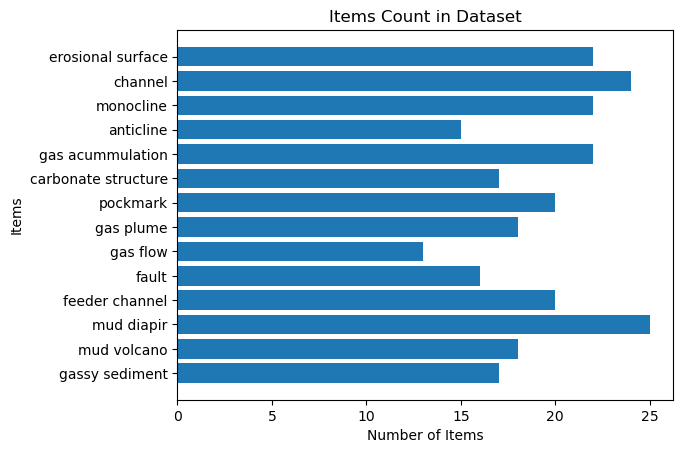

In [20]:
plt.barh(df.columns, df.sum())

plt.title("Items Count in Dataset")

plt.xlabel("Number of Items")

plt.ylabel("Items")           

plt.show();

----------

#### Save as csv

In [19]:
df.to_csv("seismic_apriori_analysis.csv")

-------------------------------

# Create Dataset by Function 

In [21]:
import numpy as np
import pandas as pd
from itertools import combinations, chain
import matplotlib.pyplot as plt
import random

In [22]:
def create_apriori_dataset(item_list, n_comb=1, sample_value = 2, transformation= True, seed = True, seed_number = 35, 
                           save=True, dataset_name ="apriori_analysis" ):
    
    
    """
    Parameters:
        - item_list = list of objects you want to analysis
        - n_comb = length of the iterable. Default value is 1. 
        - sample_value = sample value from the population. Default value is 2
        - transformation = Boolean. If True, transform data to 0 and 1. If False, the dataset variables'value are "True" and False".
        - seed = use random.seed() to get always the same result. Default is True. Boolean
        - seed_number = Default value is 35. Change what ever you want.
        - save = Save the dataset as csv. Default is True.Boolean
        - dataset_name = output name of the dataset. Default name is "apriori_analysis"
        
    info:
        - if you get "ValueError: Sample larger than population or is negative" it is mean your sample_value bigger than number of 
        observations, In this case you can incerase the n_comb value or degrease the sample_value
        
    Return:
    
        - dataframe
        
    Example:
        basket_list = [flour, sugar,tea,bread,pasta,buttermilk,cheese,chocolate,detergent,toothpaste]
            
        df_marine = create_apriori_dataset(item_list = basket_list, n_comb=4, sample_value = 100,
                                             save = True, dataset_name = "market")
                                        
    Info:
        to calculate max sample value for creating dataset according to given n_comb: 
        
        Ex:
        n_comb = 3
        len of item list = 8
        max sample_value = (8/1) + (8*7/2*1) + (8*7*6/3*2*1)  = 92
        
    """
    
    # create combination 
    comb_list = [[b  for b in combinations(item_list, r)] for r in range(1 , n_comb+1)]
    
    # combining lists in the list
    comb_list_sum = list(chain.from_iterable(comb_list))
    
    # use seed
    if seed:
        
        random.seed(seed_number)
    
    
    comb_random = random.sample(comb_list_sum, sample_value)
    
    # create dataframe
    df_new = pd.DataFrame()

    df_new["products"] = comb_random

    df_new.set_index("products", inplace = True)
    
    # make all 0
    for i in range(len(item_list)):
    
        df_new[i] = 0
    
    # give columns name
    df_new.columns = item_list
    
    # True and False if the variable in the index
    for i in range(len(item_list)):
    
        for ii in range(len(df_new)):
        
            df_new.iloc[ii,i] = df_new.columns[i] in df_new.index[ii]
            

    # transaformation true-flase to 0-1
    if transformation:
        
        df_new = df_new.astype(int)
    
    
    # save
    if save:
        
        df_new.to_csv(dataset_name+".csv")
        
    return df_new                      

In [23]:
list_of_seismic = ["gassy sediment","mud volcano","mud diapir","feeder channel", "fault","gas flow", "gas plume", 
                 "pockmark", "carbonate structure", "gas acummulation","anticline","monocline","channel","erosional surface"]

In [24]:
df_marine = create_apriori_dataset(item_list = list_of_seismic,
                                   n_comb=4,
                                   sample_value =92, 
                                   transformation= True,
                                   save = False)

----------

In [25]:
df_marine.head()

,gassy sediment,mud volcano,mud diapir,feeder channel,fault,gas flow,gas plume,pockmark,carbonate structure,gas acummulation,anticline,monocline,channel,erosional surface
products,,,,,,,,,,,,,,
"(mud diapir, carbonate structure, gas acummulation, erosional surface)",0,0,1,0,0,0,0,0,1,1,0,0,0,1
"(gassy sediment, gas flow, carbonate structure, monocline)",1,0,0,0,0,1,0,0,1,0,0,1,0,0
"(mud diapir, gas flow, pockmark)",0,0,1,0,0,1,0,1,0,0,0,0,0,0
"(gassy sediment, gas flow, monocline, erosional surface)",1,0,0,0,0,1,0,0,0,0,0,1,0,1
"(feeder channel, gas flow, carbonate structure)",0,0,0,1,0,1,0,0,1,0,0,0,0,0


-------------

## References

[1] - Rakesh Agrawal and Ramakrishnan Srikant. Fast algorithms for mining association rules. Proceedings of the 20th International Conference on Very
Large Data Bases, VLDB, pages 487-499, Santiago, Chile, September 1994. 

[2] - Wikipedia. https://en.wikipedia.org/wiki/Apriori_algorithm

[3] - Sarıtaş, H. (2018). Gas occurrence and shallow conduit systems in the Western Sea of Marmara: A review and new acoustic evidence. Geo-Marine
Letters, 38(5), 385-432. https://doi.org/10.1007/s00367-018-0547-5

[4] - itertools.combinations. https://www.geeksforgeeks.org/python-itertools-combinations-function/

[5] - itertools.chain. https://docs.python.org/3/library/itertools.html